In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import sklearn

sklearn.__version__

'1.6.1'

# Regresión Lineal Simple una sola columna

* Primero separamos la X y la Y

In [3]:
df = pd.read_csv('../Data/salaries_experience.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
# Antes del modelado debes saber primero, entendimiento del negocio, entendimiento de los datos, preparación de los datos

# Modelaro
# Aprendizaje supervisado
# Datos de Entrada X
# Datos de Salida Y
# algoritmo aprenda los datos y la relación que tiene cada entrada X con la salida Y
# i el algoritmo aprende luego puede predecir nuevas salidas y ante nuevas entradas X


X = df[['YearsExperience']] # Con doble corchete significa es un dataframe, si solo pongo unos corchetres es una serie
# type(X) es un dataframe
X[:10]


,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [5]:
y = df['Salary'] # Variable que queremos predecir o modelar es la salida Y
y[:10]

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
5    56642.0
6    60150.0
7    54445.0
8    64445.0
9    57189.0
Name: Salary, dtype: float64

In [6]:
from sklearn.linear_model import LinearRegression

# Instanciar  el algoritmo de regresión lineal

model = LinearRegression()

# Entrenar el algoritmo con fit

model.fit(X, y)
# El punto en el eje y donde la recta cruza cuando  X=0
print ("Intercepto: (w0 / b0):" ,model.intercept_)

# Tasa de cambio de  y por cada unidad de cambio en X: por cada año de experiencia el salario aumenta 9449 €
print("Coeficiente: (w1 / b1):", model.coef_) #el coeficiente es el valor de entrada

Intercepto: (w0 / b0): 25792.20019866871
Coeficiente: (w1 / b1): [9449.96232146]


* Hacemos la predicción con los datos del coef. serían años de experienc. y el coeficiente es el valor de entrada o sueldo

In [7]:
# Realizar una predicción sobre cualquier cantidad de años de experiencia

X_new = pd.DataFrame([5.78, 2.43, 9.77], columns=['YearsExperience'])
X_new

,YearsExperience
0,5.78
1,2.43
2,9.77


* Hacemos las predicciones sobre lo que debería cobrar por años de experiencia

In [8]:
X_new['Salary_pred'] = model.predict(X_new)

In [9]:
X_new

,YearsExperience,Salary_pred
0,5.78,80412.982417
1,2.43,48755.608640
2,9.77,118118.332079


* Esto mismo de predecir un nuevo salario, lo puedo hacer manual de la siguiente manera

In [10]:
experience_years = 5.78

salarY = model.intercept_ + model.coef_ * experience_years
salarY


array([80412.98241668])

* De esta manera pasando el nombre del dataframe nos da el resultado de todo lo que tenemos en el 

In [11]:
model.predict(pd.DataFrame([5.78, 2.43, 9.77], columns=['YearsExperience']))

array([ 80412.98241668,  48755.6086398 , 118118.33207928])

In [12]:
Y_pred = model.predict(X)
Y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [13]:
df['Salary_pred'] = model.predict(X)
df.head()

,YearsExperience,Salary,Salary_pred
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


* Nos hace la gráfica  para ver los errores que existen

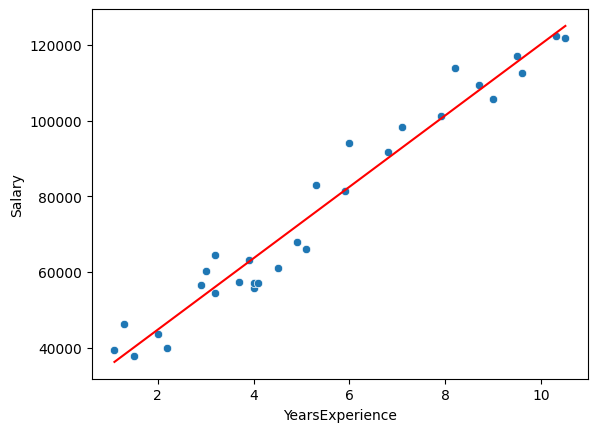

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.scatter(df['YearsExperience'], df['Salary']) # Datos originales o reales
sns.scatterplot(df, x='YearsExperience', y='Salary')
sns.lineplot(df, x='YearsExperience', y='Salary_pred', c='red');

In [15]:
from sklearn.metrics import mean_absolute_error, r2_score,root_mean_squared_error

# Error absoluto medio: Nos da un error de unos 4600€ de media tanto arriba como abajo | es un error de prediccón de media

mean_absolute_error(df['Salary'], df['Salary_pred'])

4644.2012894435375

In [16]:
# Raíz error cuadrático medio: RMSE
# Penaliza predicciones que tengan un error muy grande, si por ejemplo el modelo se ha equivocado
# en dos o tres predicciones las penaliza más que la MAE
# Este modelo nos da un error más exacto es un error de 5592€ de media puede ser por tener outleiers o errores en los datos

root_mean_squared_error(y,Y_pred)

5592.043608760662

In [17]:
# Calidad global: El modelo explica la variabilidad de los datos nos dice que hay una varianza  standar 
# De 0 a 1 | cuanto más cercano a 1 mejor en este caso  es bastante exacto

r2_score(y,Y_pred)

0.9569566641435086

# Regresión Lineal Múltiple
* Utiliza varios datos de entrada X, por ejemplo varias columnas:

In [18]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,root_mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
# Nos importamos un dataset que tenemos  en seaborn

df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


* Regresión Simple

In [20]:
# Hacer una regresión lineal simple para predecir la columna mpg

#df.isna().sum()
#df.shape
df.dropna(inplace=True)

In [21]:
# separamos la X y La Y

X = df [['horsepower']]
y = df['mpg']

model = LinearRegression()

model.fit(X,y)

y_pred = model.predict(df[['horsepower']])

print(f'r2: {r2_score(y, y_pred)}') # Cojemos el valor máximo del R2
print(f'MAE: {mean_absolute_error(y, y_pred)}') # En este proceso el valor mínimo
print(f'RMSE: {root_mean_squared_error(y, y_pred)}') # En este proceso el valor mínimo

r2: 0.6059482578894348
MAE: 3.8275871459582205
RMSE: 4.893226230065713


* Opción 1:
    * Investigar con EDAs qué columnas podrían ser las mejores para predecir mpg
    * Pairplot
    * Correlaciones y heatmap

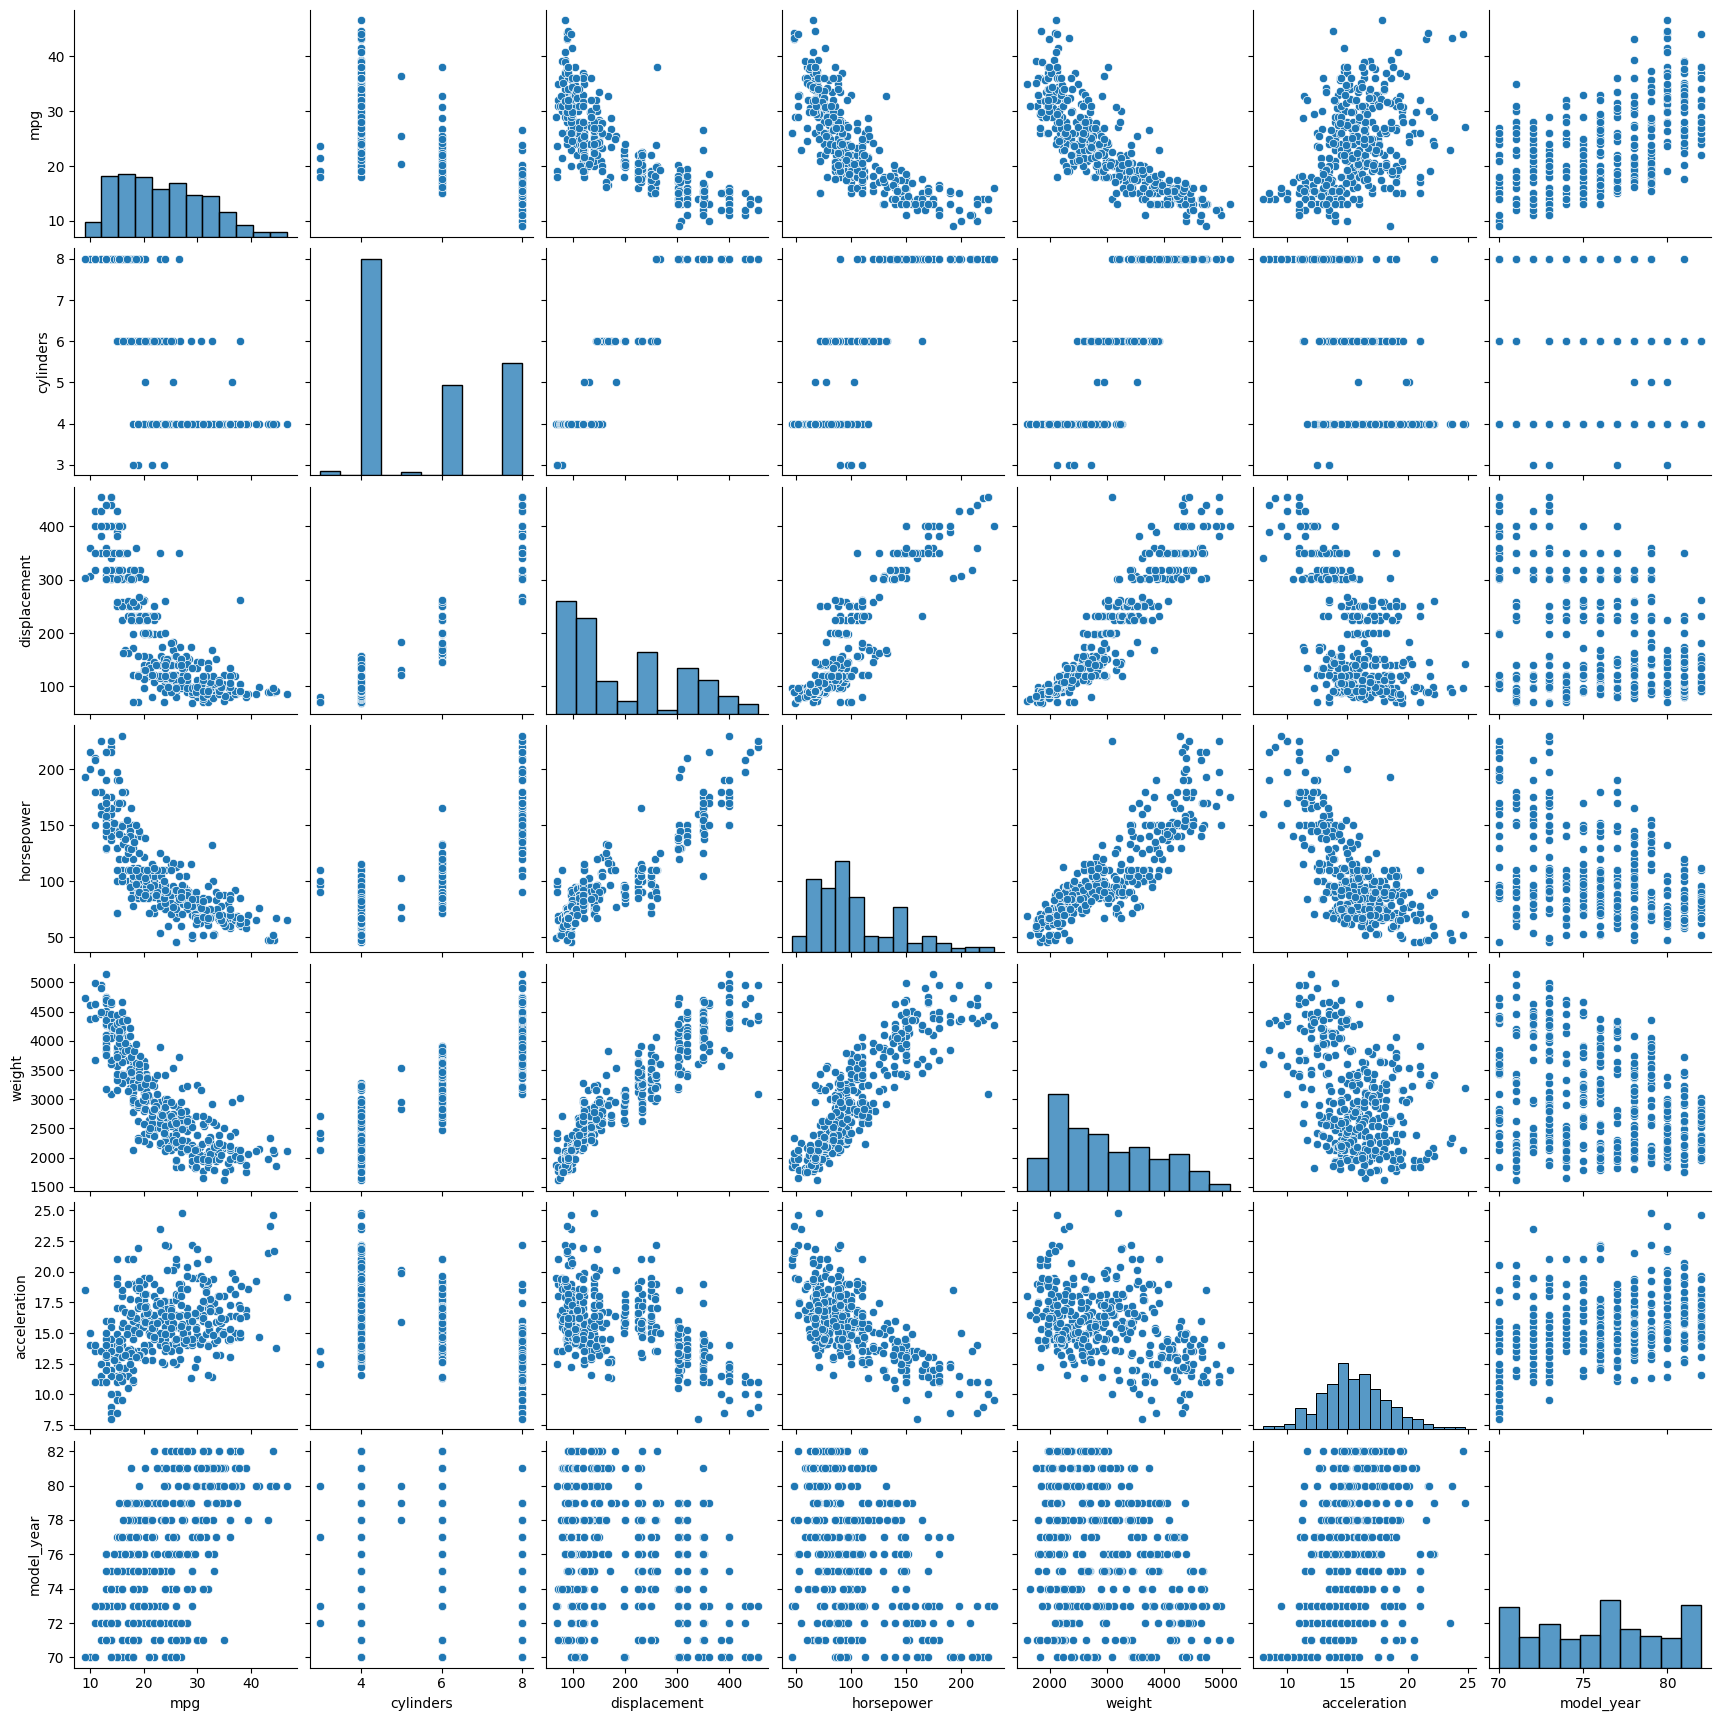

In [22]:
# nos revela todas los puntos están más en forma lineal para hacer la regresión lineal

sns.pairplot(df)

<Axes: >

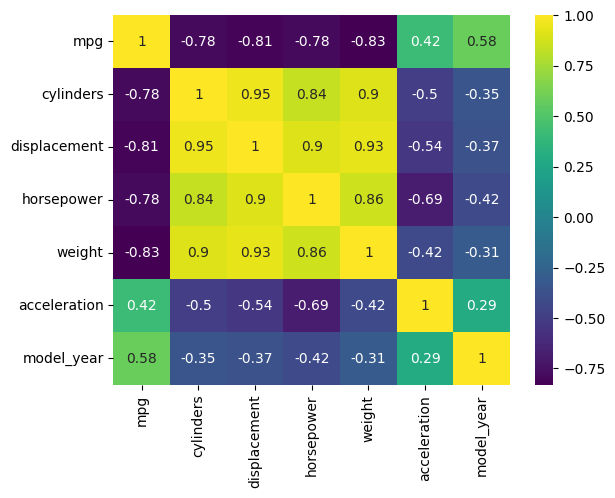

In [23]:
sns.heatmap(df.corr(numeric_only=True).round(2), annot=True, cmap='viridis')

* Opción 2:
    * Bucle for  que itere todas las columnas numéricas y lkas use una por una como X
    * Almacenando resultados en un DF
  

C:\Users\varso\AppData\Local\Temp\ipykernel_10448\3770051609.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)


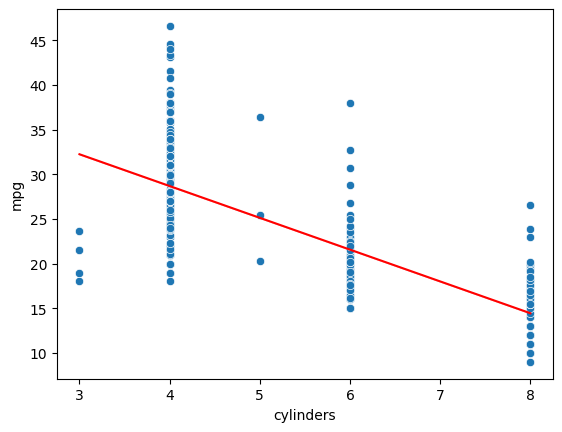

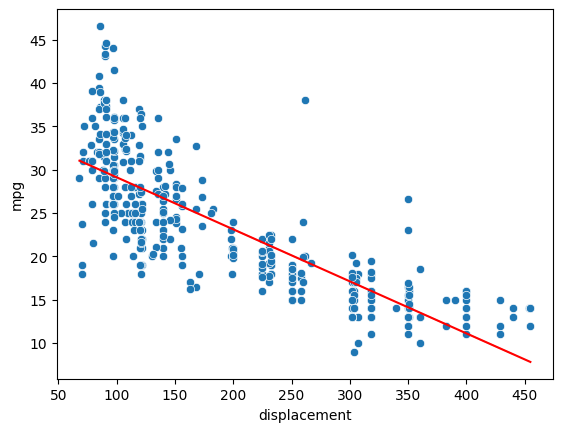

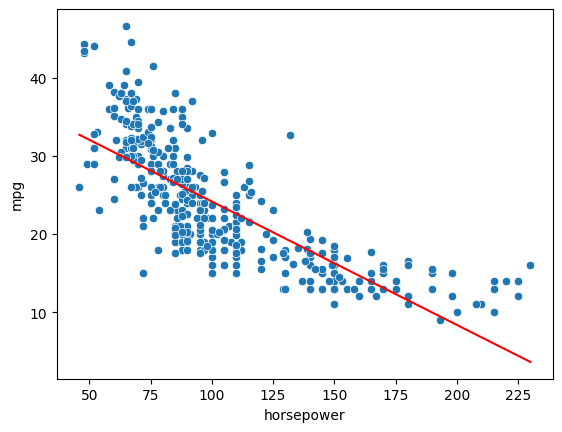

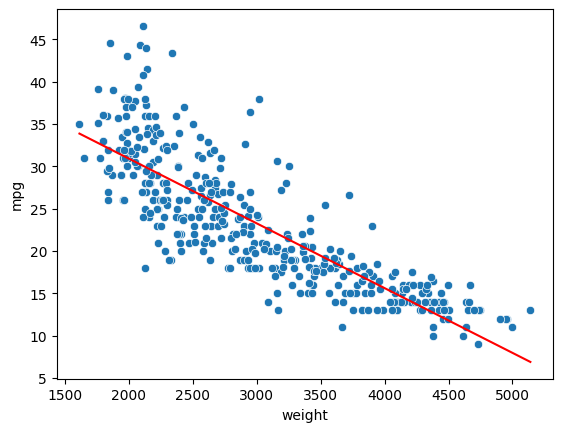

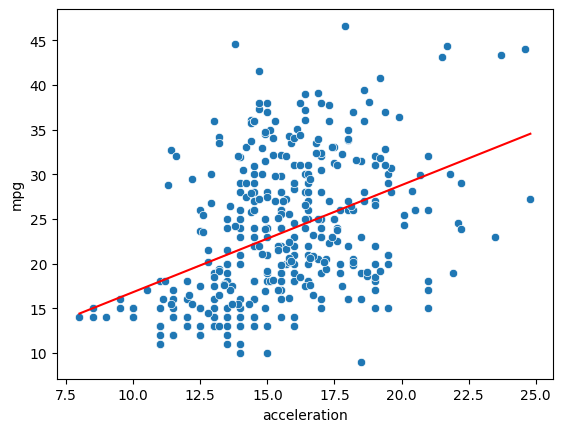

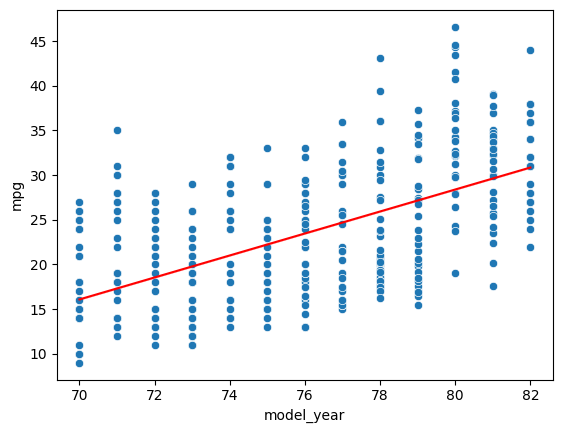

,Modelo,R2,MAE,RMSE
0,RLS cylinders,0.604689,3.711287,4.901039
1,RLS displacement,0.648229,3.506273,4.623261
2,RLS horsepower,0.605948,3.827587,4.893226
3,RLS weight,0.692630,3.278702,4.321645
4,RLS acceleration,0.179207,5.795118,7.062126
5,RLS model_year,0.337028,5.355736,6.346968


In [24]:
df_resultados = pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE'])
# Usaremos las columnas X
predictores = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year'] # en este caso predecimos una a una las columnas


for predictor in predictores:
    X = df[[predictor]]
    y = df['mpg']
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    
    df_resultados_predictor = pd.DataFrame({
        'Modelo': f'RLS {predictor}',
        'R2': [r2],# Nos interesa le valor más alto
        'MAE': [mae],# Nos interesa le valor más bajo
        'RMSE': [rmse]# Nos interesa le valor más bajo
    })
    
    df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)
    
    # opcional, mostrar cada una de las regresiones lineales simples
    sns.scatterplot(x=X[predictor], y=y)
    sns.lineplot(x=X[predictor], y=y_pred, c='red')
    plt.show()

df_resultados
    

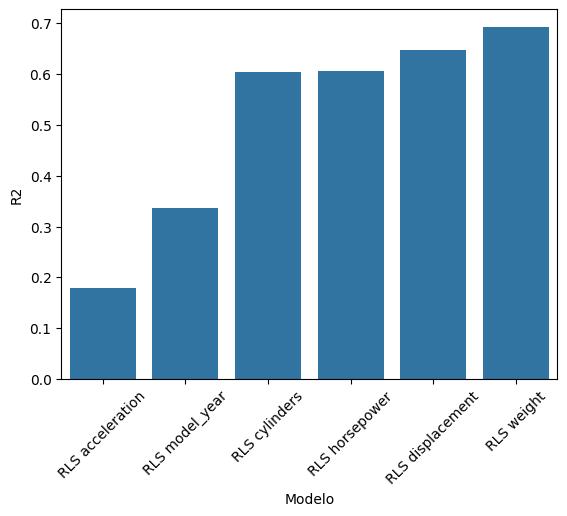

In [25]:

sns.barplot(df_resultados.sort_values('R2'), x='Modelo', y= 'R2')
plt.xticks(rotation=45);

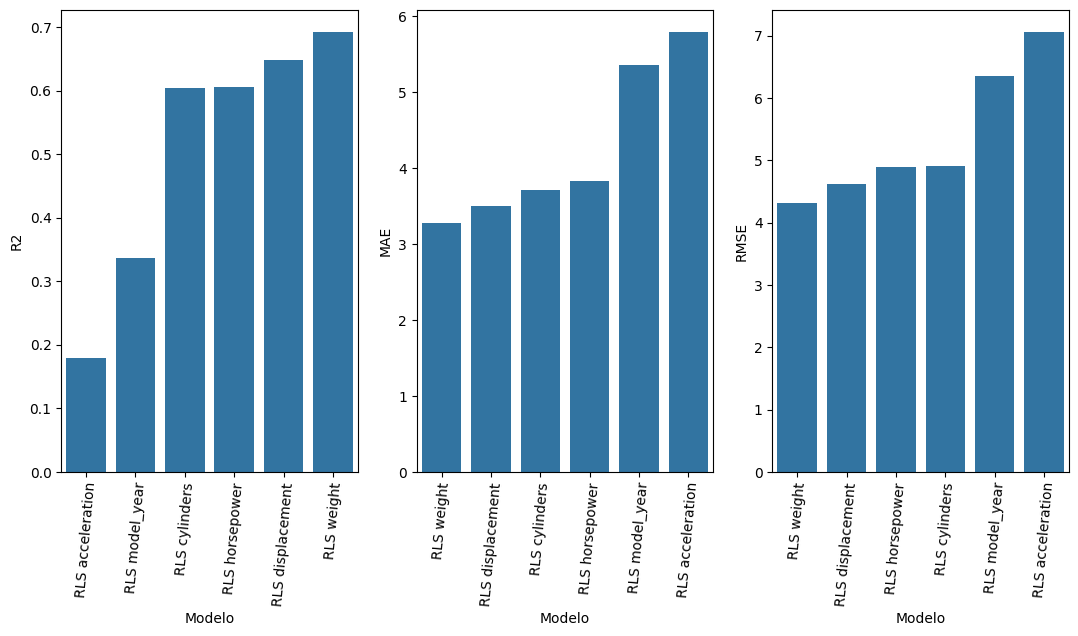

In [26]:

plt.figure(figsize=(13,6))
plt.subplot(1, 3, 1)
sns.barplot(df_resultados.sort_values('R2'), x='Modelo', y='R2') #interesa valor mas alto
plt.xticks(rotation=85)
plt.subplot(1, 3, 2)
sns.barplot(df_resultados.sort_values('MAE'), x='Modelo', y='MAE') #interesa valor mas bajo
plt.xticks(rotation=85)
plt.subplot(1, 3, 3)
sns.barplot(df_resultados.sort_values('RMSE'), x='Modelo', y='RMSE')
plt.xticks(rotation=85);

* Regresión Múltiple

In [27]:
# Hacer una regresión liuneal simple para predecir la columna mpg

df.head()
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
X = df.drop(['mpg', 'origin', 'name'], axis=1) # Borramos las columnas  no vamos usar la MPG es sobre la que predecimos por eso la borramos en X
y = df['mpg']

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
    
    # Guardar los resultaDOS
    
df_resultados_predic = pd.DataFrame({
    'Modelo': f'RL múltiple',
    'R2' : [r2],  # Nos interesa le valor más alto
    'MAE' : [mae], # Nos interesa le valor más bajo
    'RMSE' : [rmse] # Nos interesa le valor más bajo
    
})
    
df_resultados = pd.concat([df_resultados, df_resultados_predic], ignore_index=True)

df_resultados

,Modelo,R2,MAE,RMSE
0,RLS cylinders,0.604689,3.711287,4.901039
1,RLS displacement,0.648229,3.506273,4.623261
2,RLS horsepower,0.605948,3.827587,4.893226
3,RLS weight,0.692630,3.278702,4.321645
4,RLS acceleration,0.179207,5.795118,7.062126
5,RLS model_year,0.337028,5.355736,6.346968
6,RL múltiple,0.809255,2.618264,3.404434


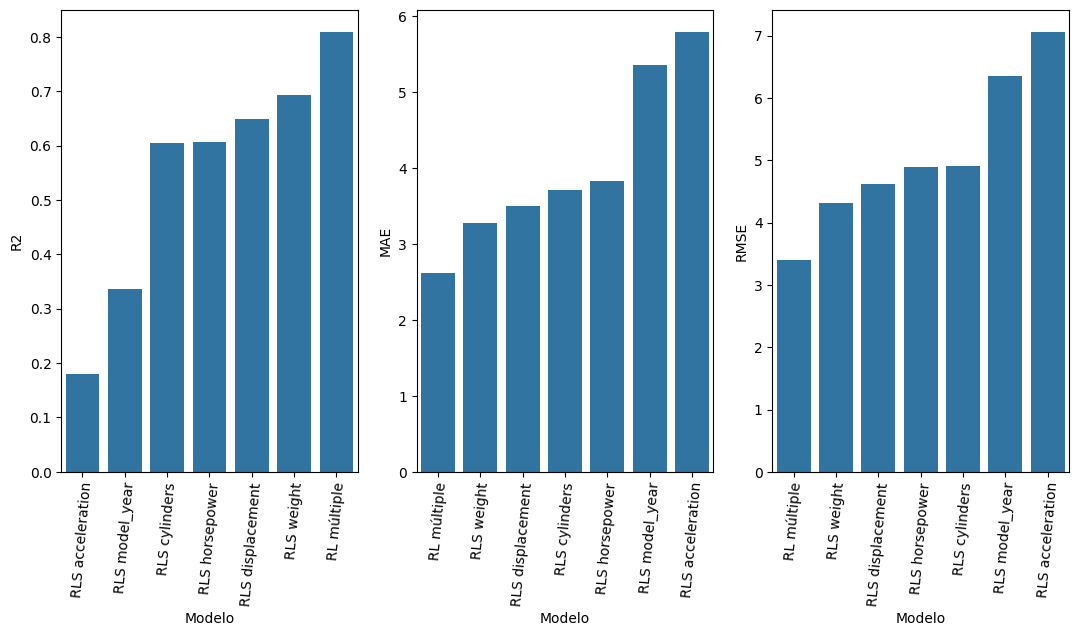

In [28]:
plt.figure(figsize=(13,6))
plt.subplot(1, 3, 1)
sns.barplot(df_resultados.sort_values('R2'), x='Modelo', y='R2') #interesa valor mas alto
plt.xticks(rotation=85)
plt.subplot(1, 3, 2)
sns.barplot(df_resultados.sort_values('MAE'), x='Modelo', y='MAE') #interesa valor mas bajo
plt.xticks(rotation=85)
plt.subplot(1, 3, 3)
sns.barplot(df_resultados.sort_values('RMSE'), x='Modelo', y='RMSE')
plt.xticks(rotation=85);

In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [30]:
type('origin')

str

In [31]:
# get_dumies: transforma la columna origin que es str en númerica
# Creamos la columna origin en númerica vaya pasamos los datos usa, japan, etc.... a números y le damos más datos para que con más info. puede ajustarse más el algoritmo
df_dumies = pd.get_dummies(df.drop('name', axis=1))

X = df_dumies.drop('mpg', axis=1)
y = df_dumies['mpg']

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
    
    # Guardar los resultaDOS
    
df_resultados_predic = pd.DataFrame({
    'Modelo': f'RL múltiple origin',
    'R2' : [r2],  # Nos interesa le valor más alto
    'MAE' : [mae], # Nos interesa le valor más bajo
    'RMSE' : [rmse] # Nos interesa le valor más bajo
    
})
    
df_resultados = pd.concat([df_resultados, df_resultados_predic], ignore_index=True)

df_resultados

,Modelo,R2,MAE,RMSE
0,RLS cylinders,0.604689,3.711287,4.901039
1,RLS displacement,0.648229,3.506273,4.623261
2,RLS horsepower,0.605948,3.827587,4.893226
3,RLS weight,0.692630,3.278702,4.321645
4,RLS acceleration,0.179207,5.795118,7.062126
5,RLS model_year,0.337028,5.355736,6.346968
6,RL múltiple,0.809255,2.618264,3.404434
7,RL múltiple origin,0.824199,2.505389,3.268352


In [32]:
df['fabricante'] = df['name'].str.split(' ').str[0]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,fabricante
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [33]:
# Observamos que la columna fabricante tiene muchos errores

df['fabricante'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [34]:
def fix_fabricante(fabricante):
    if fabricante in ['vw', 'vokswagen']:
        return 'volkswagen'
    elif fabricante in ['chevy', 'chevroelt']:
        return 'chevrolet'
    elif fabricante in ['toyouta']:
        return 'toyota'
    elif fabricante in ['capri']:
        return 'ford'
    elif fabricante in ['maxda']:
        return 'mazda'
    elif fabricante in ['mercedes', 'mercedes-benz']:
        return 'mercedes-benz'
    elif fabricante in ['hi']:
        return 'honda'
    else:
        return fabricante

df['fabricante'] =  df['fabricante'].apply(fix_fabricante)
df['fabricante'].unique

<bound method Series.unique of 0       chevrolet
1           buick
2        plymouth
3             amc
4            ford
          ...    
393          ford
394    volkswagen
395         dodge
396          ford
397     chevrolet
Name: fabricante, Length: 392, dtype: object>

In [35]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,fabricante
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [36]:
# get_dumies de origin y fabricante y regresión múltiple

df_dumies = pd.get_dummies(df.drop('name', axis=1))

X = df_dumies.drop('mpg', axis=1)
y = df_dumies['mpg']

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
    
    # Guardar los resultaDOS
    
df_resultados_predic = pd.DataFrame({
    'Modelo': f'RL múltiple all',
    'R2' : [r2],  # Nos interesa le valor más alto
    'MAE' : [mae], # Nos interesa le valor más bajo
    'RMSE' : [rmse] # Nos interesa le valor más bajo
    
})
    
df_resultados = pd.concat([df_resultados, df_resultados_predic], ignore_index=True)

df_resultados

,Modelo,R2,MAE,RMSE
0,RLS cylinders,0.604689,3.711287,4.901039
1,RLS displacement,0.648229,3.506273,4.623261
2,RLS horsepower,0.605948,3.827587,4.893226
3,RLS weight,0.692630,3.278702,4.321645
4,RLS acceleration,0.179207,5.795118,7.062126
5,RLS model_year,0.337028,5.355736,6.346968
6,RL múltiple,0.809255,2.618264,3.404434
7,RL múltiple origin,0.824199,2.505389,3.268352
8,RL múltiple all,0.842213,2.369265,3.096376


# Particionamiento train_test_split 80% 20%

In [41]:

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42) # el random_state se suele poner 42 como número referencial siempre

In [ ]:
model = LinearRegression()

model.fit(x_train, y_train) # aquí nos entrena con el 80% de los datos

# Y_pred son las predicciones  que genera el modelo X_test
y_pred = model.predict(x_test) # Aquí predecimos con el 20% de datos de test que no conocemos



r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
    
   
 
df_resultados_predic = pd.DataFrame({
    'Modelo': f'RL múltiple all test (test 20%)',
    'R2' : [r2],  # Nos interesa le valor más alto
    'MAE' : [mae], # Nos interesa le valor más bajo
    'RMSE' : [rmse] # Nos interesa le valor más bajo
    
})
    
df_resultados = pd.concat([df_resultados, df_resultados_predic], ignore_index=True)

df_resultados

,Modelo,R2,MAE,RMSE
0,RLS cylinders,0.604689,3.711287,4.901039
1,RLS displacement,0.648229,3.506273,4.623261
2,RLS horsepower,0.605948,3.827587,4.893226
3,RLS weight,0.692630,3.278702,4.321645
4,RLS acceleration,0.179207,5.795118,7.062126
5,RLS model_year,0.337028,5.355736,6.346968
6,RL múltiple,0.809255,2.618264,3.404434
7,RL múltiple origin,0.824199,2.505389,3.268352
8,RL múltiple all,0.842213,2.369265,3.096376
9,RL múltiple all test (test 20%),0.771595,2.644372,3.414370


* Vemos que el modelo de regresión lineal múltiple empeora al predecir sobre datos que nunca ha visto (X_test)
* Esto es normal porque el modelo no ha entrenado con esos datos
* El particionamiento nos ayuda a ver una prueba más realista de cómo se comportaría el modelo ante nuevos datos que no conoce

# Esquema de Trabajo:

* Cargar los datos , sean de csv, excel etc....
* Identificar el tipo de problema de modelado: regresión o clasificación
* Preparar datos 
* Separar datos
    * Sin particionamiento: en X, y  
    * Con particionamiento: X_train, X_test, y_train, y_test
* Modelado: usar distintos algoritmos
* Evaluación: métricvas de regresión o métricas de clasisicación
* Despliegue